# **1. Defining the Question**

### a) Defining the question

Which individual are most likely to have or use a bank account?

### b) Defining the Metric for Success

### c) Understanding the context 

### d) Recording the Experimental Design

### e) Data Relevance

# **2. Reading the Data**

In [317]:
# Importing the Libraries

import numpy as np
import pandas as pd
from subprocess import check_output
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [318]:
# Load our database
df = pd.read_csv("/content/Financial Dataset - 1.csv", sep=',' , encoding='utf-8')

In [319]:
df3 = pd.read_csv('/content/VariableDefinitions.csv', header=1)

# **3. Checking the Data**

In [270]:
# Viewing the table

df3

,country,Country interviewee is in.
0,year,Year survey was done in.
1,uniqueid,Unique identifier for each interviewee
2,location_type,"Type of location: Rural, Urban"
3,cellphone_access,"If interviewee has access to a cellphone: Yes, No"
4,household_size,Number of people living in one house
5,age_of_respondent,The age of the interviewee
6,gender_of_respondent,"Gender of interviewee: Male, Female"
7,relationship_with_head,The interviewee’s relationship with the head o...
8,marital_status,The martial status of the interviewee: Married...
9,education_level,Highest level of education: No formal educatio...


In [271]:
# Preview our database
df.head()

,country,year,uniqueid,Has a Bank account,Type of Location,Cell Phone Access,household_size,Respondent Age,gender_of_respondent,The relathip with head,marital_status,Level of Educuation,Type of Job
0,Kenya,2018,uniqueid_1,Yes,Rural,Yes,3.0,24.0,Female,Spouse,Married/Living together,Secondary education,Self employed
1,Kenya,2018,uniqueid_2,No,Rural,No,5.0,70.0,Female,Head of Household,Widowed,No formal education,Government Dependent
2,Kenya,2018,uniqueid_3,Yes,Urban,Yes,5.0,26.0,Male,Other relative,Single/Never Married,Vocational/Specialised training,Self employed
3,Kenya,2018,uniqueid_4,No,Rural,Yes,5.0,34.0,Female,Head of Household,Married/Living together,Primary education,Formally employed Private
4,Kenya,2018,uniqueid_5,No,Urban,No,8.0,26.0,Male,Child,Single/Never Married,Primary education,Informally employed


In [272]:
# Preview te last 5 rows of our database
df.tail()

,country,year,uniqueid,Has a Bank account,Type of Location,Cell Phone Access,household_size,Respondent Age,gender_of_respondent,The relathip with head,marital_status,Level of Educuation,Type of Job
23519,Uganda,2018,uniqueid_2113,No,Rural,Yes,4.0,48.0,Female,Head of Household,Divorced/Seperated,No formal education,Other Income
23520,Uganda,2018,uniqueid_2114,No,Rural,Yes,2.0,27.0,Female,Head of Household,Single/Never Married,Secondary education,Other Income
23521,Uganda,2018,uniqueid_2115,No,Rural,Yes,5.0,27.0,Female,Parent,Widowed,Primary education,Other Income
23522,Uganda,2018,uniqueid_2116,No,Urban,Yes,7.0,30.0,Female,Parent,Divorced/Seperated,Secondary education,Self employed
23523,Uganda,2018,uniqueid_2117,No,Rural,Yes,10.0,20.0,Male,Child,Single/Never Married,Secondary education,No Income


In [273]:
# Determining the no. of records in our dataset

df.shape

(23524, 13)

In [274]:
# Standardization; Replacing column names which are uppercase, with spaces, 
# and whitespace all around.
df.columns = df.columns.str.strip().str.upper().str.replace(' ', '_').str.replace('(', '').str.replace(')', '')

In [275]:
# Checking whether each column has an appropriate datatype

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23524 entries, 0 to 23523
Data columns (total 13 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   COUNTRY                 23510 non-null  object 
 1   YEAR                    23524 non-null  int64  
 2   UNIQUEID                23524 non-null  object 
 3   HAS_A_BANK_ACCOUNT      23488 non-null  object 
 4   TYPE_OF_LOCATION        23509 non-null  object 
 5   CELL_PHONE_ACCESS       23513 non-null  object 
 6   HOUSEHOLD_SIZE          23496 non-null  float64
 7   RESPONDENT_AGE          23490 non-null  float64
 8   GENDER_OF_RESPONDENT    23490 non-null  object 
 9   THE_RELATHIP_WITH_HEAD  23520 non-null  object 
 10  MARITAL_STATUS          23492 non-null  object 
 11  LEVEL_OF_EDUCUATION     23495 non-null  object 
 12  TYPE_OF_JOB             23494 non-null  object 
dtypes: float64(2), int64(1), object(10)
memory usage: 2.3+ MB


In [276]:
# Checking whether each column has an appropriate datatype

df.dtypes

COUNTRY                    object
YEAR                        int64
UNIQUEID                   object
HAS_A_BANK_ACCOUNT         object
TYPE_OF_LOCATION           object
CELL_PHONE_ACCESS          object
HOUSEHOLD_SIZE            float64
RESPONDENT_AGE            float64
GENDER_OF_RESPONDENT       object
THE_RELATHIP_WITH_HEAD     object
MARITAL_STATUS             object
LEVEL_OF_EDUCUATION        object
TYPE_OF_JOB                object
dtype: object

In [277]:
# Completeness; We check for any missing values
df.isnull().sum().sort_values(ascending=False)

HAS_A_BANK_ACCOUNT        36
GENDER_OF_RESPONDENT      34
RESPONDENT_AGE            34
MARITAL_STATUS            32
TYPE_OF_JOB               30
LEVEL_OF_EDUCUATION       29
HOUSEHOLD_SIZE            28
TYPE_OF_LOCATION          15
COUNTRY                   14
CELL_PHONE_ACCESS         11
THE_RELATHIP_WITH_HEAD     4
UNIQUEID                   0
YEAR                       0
dtype: int64

In [278]:
# Dropping the missing values columns

df1 = df.dropna()
df1.shape

(23343, 13)

In [279]:
# checking for duplicates
df1.duplicated().value_counts()

False    23343
dtype: int64

# **4. Tidying the Dataset**

* Defining the dataset with those who have a bank account

In [280]:
# Ensuring the data is only for those with a bank account

newdf = df1_out.loc[(df1_out.HAS_A_BANK_ACCOUNT == 'Yes') & (df1_out.GENDER_OF_RESPONDENT)  & (df1_out.HOUSEHOLD_SIZE) & (df1_out.RESPONDENT_AGE)]



In [281]:
# Checking the data for the people with a bank account

newdf.shape

(3167, 13)

In [282]:
#  Checking whether each column has an appropriate datatype

newdf.dtypes

COUNTRY                    object
YEAR                        int64
UNIQUEID                   object
HAS_A_BANK_ACCOUNT         object
TYPE_OF_LOCATION           object
CELL_PHONE_ACCESS          object
HOUSEHOLD_SIZE            float64
RESPONDENT_AGE            float64
GENDER_OF_RESPONDENT       object
THE_RELATHIP_WITH_HEAD     object
MARITAL_STATUS             object
LEVEL_OF_EDUCUATION        object
TYPE_OF_JOB                object
dtype: object

<function matplotlib.pyplot.show>

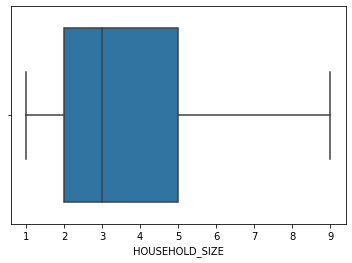

In [283]:
# Checking for outliers
# Visualization of outliers

fig.suptitle('Boxplots')
sns.boxplot(newdf['HOUSEHOLD_SIZE'])

plt.show

* There are no outliers in the Household size column

<function matplotlib.pyplot.show>

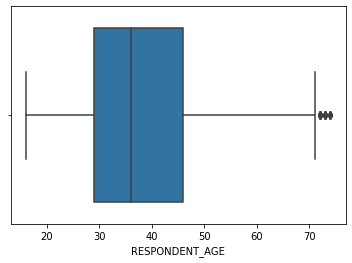

In [284]:
fig.suptitle('Boxplots')
sns.boxplot(newdf['RESPONDENT_AGE'])
plt.show

* There are 3 outliers in the Respondent age

In [285]:
# Checking for Outliers
from scipy import stats

Q1 = newdf.quantile(0.25)
Q3 = newdf.quantile(0.75)
IQR = Q3 - Q1
print(IQR)

YEAR               2.0
HOUSEHOLD_SIZE     3.0
RESPONDENT_AGE    17.0
dtype: float64


In [286]:
# eliminating outliers
df1_out = newdf[~((newdf < (Q1 - 1.5 * IQR)) |(newdf > (Q3 + 1.5 * IQR))).any(axis=1)]
df1_out.shape

(3134, 13)

# **5. Measures of Central Tendency**

Measures of Central Tendency for HOUSEHOLD_SIZE

In [287]:
# Displaying the summary statistics of the dataframe

df1_out["HOUSEHOLD_SIZE"].describe()

count    3134.000000
mean        3.481812
std         2.040170
min         1.000000
25%         2.000000
50%         3.000000
75%         5.000000
max         9.000000
Name: HOUSEHOLD_SIZE, dtype: float64

In [288]:
# Finding the median

df1_out["HOUSEHOLD_SIZE"].median()

3.0

In [289]:
# Finding the mode

df1_out["HOUSEHOLD_SIZE"].mode()

0    1.0
dtype: float64

In [290]:
# Calculating the range

df1_out_max = df1_out["HOUSEHOLD_SIZE"].max()
df1_out_min = df1_out["HOUSEHOLD_SIZE"].min()

df2 = df1_out_max - df1_out_min
df2

8.0

In [291]:
# Calculating the variance

df1_out["HOUSEHOLD_SIZE"].var()

4.162292788279621

In [292]:
# Determining the skeweness

df1_out["HOUSEHOLD_SIZE"].skew()

0.5674897694226541

In [293]:
# Determining the kurtosis
# platykurtic since its < 0
df1_out["HOUSEHOLD_SIZE"].kurt()

-0.5252335301948885

Measures of Central Tendency for RESPONDENT_AGE

In [294]:
# Displaying the summary statistics of the dataframe

df1_out["RESPONDENT_AGE"].describe()

count    3134.000000
mean       38.159860
std        12.433967
min        16.000000
25%        29.000000
50%        36.000000
75%        46.000000
max        71.000000
Name: RESPONDENT_AGE, dtype: float64

In [295]:
# Finding the median

df1_out["RESPONDENT_AGE"].median()

36.0

In [296]:
# Finding the mode

df1_out["RESPONDENT_AGE"].mode()

0    30.0
dtype: float64

In [297]:
# Calculating the range

df1_out_max = df1_out["RESPONDENT_AGE"].max()
df1_out_min = df1_out["RESPONDENT_AGE"].min()

df2 = df1_out_max - df1_out_min
df2

55.0

In [298]:
# Calculating the variance

df1_out["RESPONDENT_AGE"].var()

154.60354622988342

In [299]:
# Determining the skeweness

df1_out["RESPONDENT_AGE"].skew()

0.6746398911778324

In [300]:
# Determining the kurtosis
# platykurtic since its < 0
df1_out["RESPONDENT_AGE"].kurt()

-0.2724158991449208

# **6. Exploratory Analysis**

In [301]:
df1_out.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3134 entries, 0 to 23362
Data columns (total 13 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   COUNTRY                 3134 non-null   object 
 1   YEAR                    3134 non-null   int64  
 2   UNIQUEID                3134 non-null   object 
 3   HAS_A_BANK_ACCOUNT      3134 non-null   object 
 4   TYPE_OF_LOCATION        3134 non-null   object 
 5   CELL_PHONE_ACCESS       3134 non-null   object 
 6   HOUSEHOLD_SIZE          3134 non-null   float64
 7   RESPONDENT_AGE          3134 non-null   float64
 8   GENDER_OF_RESPONDENT    3134 non-null   object 
 9   THE_RELATHIP_WITH_HEAD  3134 non-null   object 
 10  MARITAL_STATUS          3134 non-null   object 
 11  LEVEL_OF_EDUCUATION     3134 non-null   object 
 12  TYPE_OF_JOB             3134 non-null   object 
dtypes: float64(2), int64(1), object(10)
memory usage: 342.8+ KB


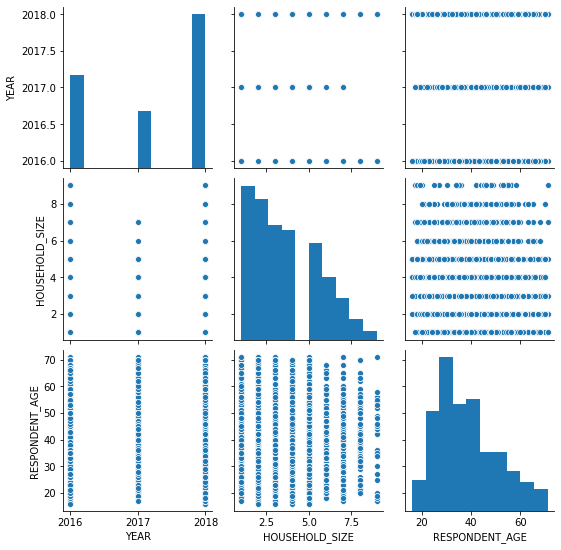

In [302]:
# Ploting the bivariate summaries and recording our observations

sns.pairplot(df1_out)
plt.show()

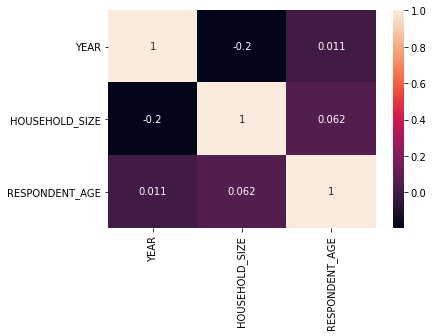

In [303]:
sns.heatmap(df1_out.corr(),annot=True)
plt.show()

* Theres a weak negative correlation between household size and year
* Theres a weak positive correlation between respondent age and year
* Theres a weak positive correlation between respondent age and household size

* Hence the data has a weak correlation

# **7. Graphical Representation**

Text(0.5, 1.0, 'HOUSEHOLD_SIZE')

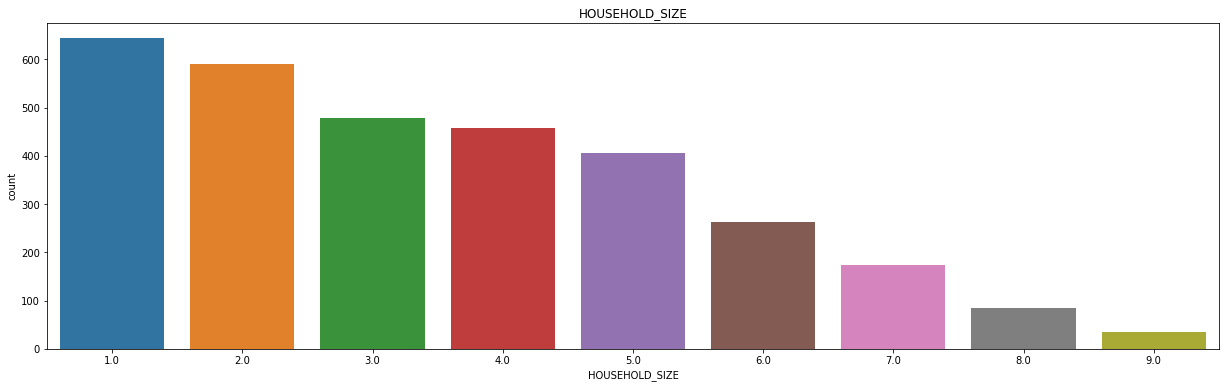

In [342]:
plt.figure(figsize=(21, 6))
sns.countplot(df1_out.HOUSEHOLD_SIZE.dropna(), order = df1_out.HOUSEHOLD_SIZE.value_counts().index);
plt.title('HOUSEHOLD_SIZE')

* Households with 1 person have a higher count than houses with 9 individuals.

Text(0.5, 1.0, 'RESPONDENT_AGE')

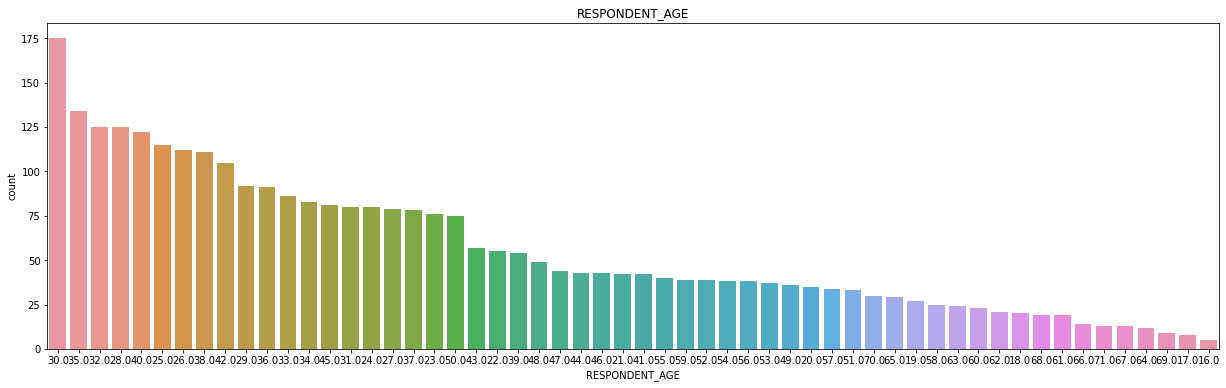

In [341]:
plt.figure(figsize=(21, 6))
sns.countplot(df1_out.RESPONDENT_AGE.dropna(), order = df1_out.RESPONDENT_AGE .value_counts().index);
plt.title('RESPONDENT_AGE')

* People who are 30 years of age have the highest count from the population

Text(0.5, 1.0, 'TYPE_OF_JOB')

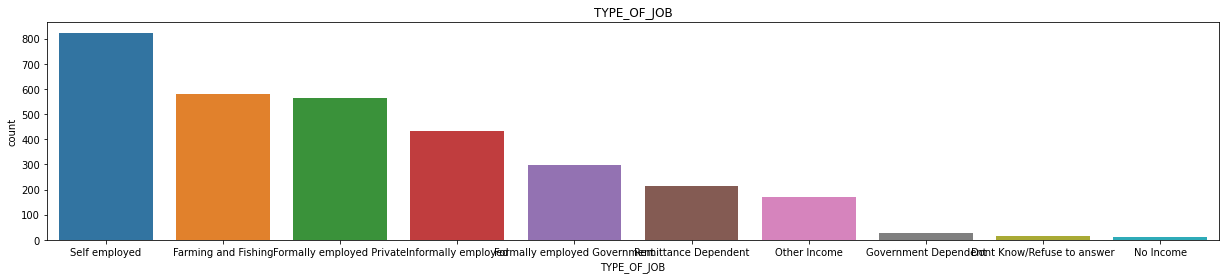

In [304]:
plt.figure(figsize=(21, 4))
sns.countplot(df1_out.TYPE_OF_JOB .dropna(), order = df1_out.TYPE_OF_JOB .value_counts().index);
plt.title('TYPE_OF_JOB')

* We can see that Self employment has a larger count compared to any other type of job
* From remittance dependent theres a less than half the count by the concurrent types of employment/ job

Text(0.5, 1.0, 'MARITAL_STATUS')

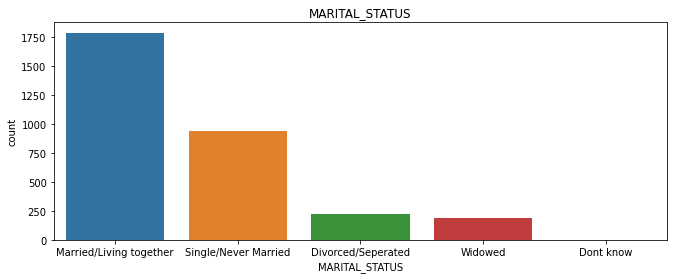

In [305]:
plt.figure(figsize=(11, 4))
sns.countplot(df1_out.MARITAL_STATUS.dropna(), order = df1_out.MARITAL_STATUS.value_counts().index);
plt.title('MARITAL_STATUS')

* Married couples have a larger count compared to any other group of individuals
* The divorced have the lowest count in income.

Text(0.5, 1.0, 'LEVEL_OF_EDUCUATION')

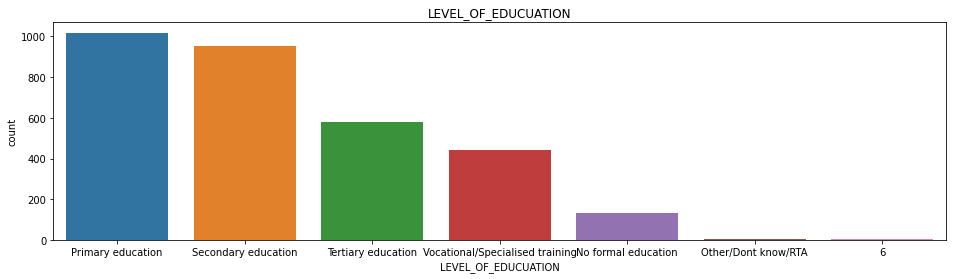

In [306]:
plt.figure(figsize=(16, 4))
sns.countplot(df1_out.LEVEL_OF_EDUCUATION.dropna(), order = df1_out.LEVEL_OF_EDUCUATION.value_counts().index);
plt.title('LEVEL_OF_EDUCUATION')

* Most of the population has passed through primary education
* Less than half went past highschool
* Hence fewer people in the vocational and tertiary education

Text(0.5, 1.0, 'Relationship with the Head')

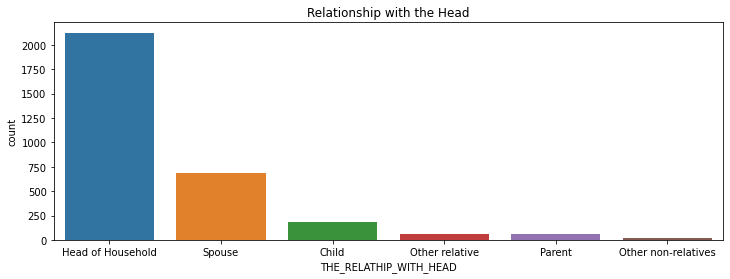

In [307]:
plt.figure(figsize=(12, 4))
sns.countplot(df1_out.THE_RELATHIP_WITH_HEAD.dropna(), order = df1_out.THE_RELATHIP_WITH_HEAD.value_counts().index);
plt.title('Relationship with the Head')

* The house head have a higher count while the other relative and other non-relatives have a lower count of less than 2000

Text(0.5, 1.0, 'Location of the Persons')

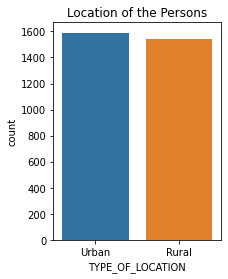

In [308]:
plt.figure(figsize=(3, 4))
sns.countplot(df1_out.TYPE_OF_LOCATION.dropna(), order = df1_out.TYPE_OF_LOCATION.value_counts().index);
plt.title('Location of the Persons')


* Most of the population belongs to the urban areas, hence in the urban areas
* at least more than 1500 persons belong to the Urban areas 

# **8. Multivariate Analysis / Implementing the solution**

Principal Component Analysis

In [321]:
# Importing the libraries

sns.set_style()

In [322]:
# Processing import standardScaler
# Standardizing the data

from sklearn.preprocessing import StandardScaler

target = ['HOUSEHOLD_SIZE', 'RESPONDENT_AGE']

x = df1_out.loc[:,target].values
y = df1_out.loc[:,['GENDER_OF_RESPONDENT']]

x = StandardScaler().fit_transform(x)


In [323]:
# Listing the components as 2 dimensional
# PCA projection to 2D

from sklearn.decomposition import PCA

pca = PCA(n_components=2)
principalComponents = pca.fit_transform(x)
principalDf = pd.DataFrame(data = principalComponents,
                           columns = ["principal component 1", 
                                      "principal component 2"])

In [324]:
# Concatenating the datafremes along axis = 1

finalDf = pd.concat([principalDf, df1_out[['GENDER_OF_RESPONDENT']]], axis = 1)

In [348]:
# Viewing the concat of PC1 and PC2

finalDf.head()

,principal component 1,principal component 2,GENDER_OF_RESPONDENT
0,-0.972404,0.638366,Female
1,-0.165353,1.217905,NaN
2,0.733937,-1.067975,Male
3,1.587108,-1.921146,NaN
4,0.238172,1.507674,NaN


In [344]:
df5 = finalDf.dropna()

In [326]:
finalDf.shape

(5507, 3)

ValueError: ignored

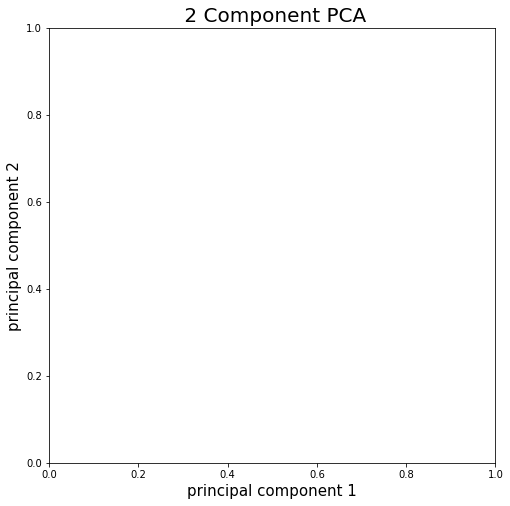

In [327]:
# Visualize 2D projection

fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1)
ax.set_xlabel('principal component 1', fontsize = 15)
ax.set_ylabel('principal component 2', fontsize = 15)
ax.set_title(' 2 Component PCA', fontsize = 20)

targets = ['Female', 'Male']
colors = ['r', 'g']
for target, color in zip(targets, colors):
  indicesToKeep = finalDf['GENDER_OF_RESPONDENT'] == GENDER_OF_RESPONDENT
  ax.scatter(finalDf.loc[indicesToKeep, 'principal component 1'],
             finalDf.loc[indicesToKeep, 'principal component 2'],
             c = color,
             s = 50)
  
ax.legend(GENDER_OF_RESPONDENT)
ax.grid()

* The error experienced since males and females count are not equal. eg(i.e. they are 1749 males and 1428 females hence not equal match)

In [328]:
pca.explained_variance_ratio_

# Together the first two principal components contain 100% of the information.
# The first principal component analysis contains 53.098% of the variance 
# and the second component analysis contains 46.902% off the variance
# Variance lost = 0

array([0.53098172, 0.46901828])

# **9. T Test**

* Test of the Hypothesis - Is the average gender of male and female population is equal or same
* First use groupby function to check the mean difference and describe it
* Null hypothesis - there is no significant difference in the average gender of the male and female population
* Alternate hypothesis - there is significant difference in the average gender of male and female population.

In [329]:
# Showing descriptive statistics from pandas.describe()

df1_out.groupby("GENDER_OF_RESPONDENT")["HOUSEHOLD_SIZE"].describe()

,count,mean,std,min,25%,50%,75%,max
GENDER_OF_RESPONDENT,,,,,,,,
Female,1411.0,3.515946,1.968978,1.0,2.0,3.0,5.0,9.0
Male,1723.0,3.453860,2.096826,1.0,2.0,3.0,5.0,9.0


* There are more females to males
* Males have a higher mean than females

In [330]:
# Showing descriptive statistics from researchpy.summary_cont()

!pip install -q researchpy
import researchpy as rp
rp.summary_cont(df1_out.groupby("GENDER_OF_RESPONDENT")["HOUSEHOLD_SIZE"])

,N,Mean,SD,SE,95% Conf.,Interval
GENDER_OF_RESPONDENT,,,,,,
Female,1411,3.5159,1.9690,0.0524,3.4131,3.6188
Male,1723,3.4539,2.0968,0.0505,3.3548,3.5529


* Males have a higher standard error to females
* At 95% confidence interval (CI), males have a higher CI to females
* Males have a higher standard deviation (std) to females

In [331]:
# Calculating the mean using the groupby function

df1_out.HOUSEHOLD_SIZE.groupby(df1_out.GENDER_OF_RESPONDENT).mean()

GENDER_OF_RESPONDENT
Female    3.515946
Male      3.453860
Name: HOUSEHOLD_SIZE, dtype: float64

In [332]:
# Breaking the data into groups

female = df1_out[df1_out.GENDER_OF_RESPONDENT == 'Female']
male = df1_out[df1_out.GENDER_OF_RESPONDENT == 'Male']

In [333]:
# A preview of breaking the data according to males
male.head()

,COUNTRY,YEAR,UNIQUEID,HAS_A_BANK_ACCOUNT,TYPE_OF_LOCATION,CELL_PHONE_ACCESS,HOUSEHOLD_SIZE,RESPONDENT_AGE,GENDER_OF_RESPONDENT,THE_RELATHIP_WITH_HEAD,MARITAL_STATUS,LEVEL_OF_EDUCUATION,TYPE_OF_JOB
2,Kenya,2018,uniqueid_3,Yes,Urban,Yes,5.0,26.0,Male,Other relative,Single/Never Married,Vocational/Specialised training,Self employed
8,Kenya,2018,uniqueid_9,Yes,Rural,Yes,3.0,54.0,Male,Head of Household,Married/Living together,Secondary education,Farming and Fishing
11,Kenya,2018,uniqueid_12,Yes,Rural,Yes,3.0,69.0,Male,Head of Household,Married/Living together,Secondary education,Other Income
21,Kenya,2018,uniqueid_22,Yes,Urban,Yes,1.0,32.0,Male,Head of Household,Single/Never Married,Vocational/Specialised training,Self employed
56,Kenya,2018,uniqueid_57,Yes,Rural,Yes,6.0,50.0,Male,Head of Household,Married/Living together,Vocational/Specialised training,Formally employed Government


In [334]:
# Importing the t-test function

from scipy.stats import ttest_ind

In [335]:
# Testing the assumptions 
# Check for equal variance

ttest_ind(female.HOUSEHOLD_SIZE,male.HOUSEHOLD_SIZE,equal_var=False)

# since p-value greater than 0.05, Fail to Reject Null and Reject Alternative

Ttest_indResult(statistic=0.8528759990685696, pvalue=0.39379451715026814)

**Test 2**

* Optional Test 2
* Checking for a second t-test
* Null hypothesis - there is no significant difference in the average age of females and males population
* Alternate hypothesis - there is significant difference in the average age of females and males population.

In [336]:
# Using the group by 
df1_out.RESPONDENT_AGE.groupby(df1_out.RESPONDENT_AGE).mean()

RESPONDENT_AGE
16.0    16.0
17.0    17.0
18.0    18.0
19.0    19.0
20.0    20.0
21.0    21.0
22.0    22.0
23.0    23.0
24.0    24.0
25.0    25.0
26.0    26.0
27.0    27.0
28.0    28.0
29.0    29.0
30.0    30.0
31.0    31.0
32.0    32.0
33.0    33.0
34.0    34.0
35.0    35.0
36.0    36.0
37.0    37.0
38.0    38.0
39.0    39.0
40.0    40.0
41.0    41.0
42.0    42.0
43.0    43.0
44.0    44.0
45.0    45.0
46.0    46.0
47.0    47.0
48.0    48.0
49.0    49.0
50.0    50.0
51.0    51.0
52.0    52.0
53.0    53.0
54.0    54.0
55.0    55.0
56.0    56.0
57.0    57.0
58.0    58.0
59.0    59.0
60.0    60.0
61.0    61.0
62.0    62.0
63.0    63.0
64.0    64.0
65.0    65.0
66.0    66.0
67.0    67.0
68.0    68.0
69.0    69.0
70.0    70.0
71.0    71.0
Name: RESPONDENT_AGE, dtype: float64

In [337]:
# Testing the assumptions 
# Check for equal variance

ttest_ind(female.RESPONDENT_AGE,male.RESPONDENT_AGE,equal_var=False) 

# Since p-value less than 0.05, reject null hypothesis and fail to reject alternate hypothesis

Ttest_indResult(statistic=-3.5069126287655514, pvalue=0.0004600145680364657)

# **10. Challenging the Solution**

* Providence of an equal data between the female and male populant would have provided a plot for the difference between the chances of who can have a bank account.
* More indicator and parameters would have modeled an effective comparison graph for the bivariate analysis since various graphs would have been used for analysis and comparison.
* Prefered mode of banking data would have provided more insights on the various modes of banking

# **11. Conclusion**

* From the data we see that the male population has a 53% chance of having a bank account compared to the female population who have a chance of 47% to have a bank account.
* We dropped the null hypothesis for if there was a significance in the average ages of male and females becaus eit had a p-value of less than 0.05